In [1]:
from sklearn.neighbors import BallTree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
from tqdm import tqdm_notebook
import pickle

tetta = np.array(range(10,71))
w = np.exp(-2*np.log(tetta/54)**2)/tetta

data = pd.read_csv("borovkova/database_txt/database.txt",delimiter ="\t",header=-1)#ненормированны
data.iloc[:,4:] = data.values[:,4:]*w

data_test = pd.read_csv("borovkova/database_txt/test_1000.txt",delimiter ="\t",header=-1)#нормированны

data_exp = pd.read_csv("borovkova/database_txt/experiment_1000.txt",delimiter ="\t",header=-1)#нормированны

In [62]:
ref_points = np.logspace(3,5.7,30).astype('int64')

In [4]:
def calc_time_for_samples(brute_tree, ball_tree, test_data, deep = 1):
    start_time = time.clock()
    dist1, ind1 = brute_tree.query(test_data, k=deep)
    brute_tree_summary_time = time.clock() - start_time
    
    start_time = time.clock()
    dist2, ind2 = ball_tree.query(test_data, k=deep)
    ball_tree_summary_time = time.clock() - start_time
    
    assert np.array_equal(ind1,ind2)
    return brute_tree_summary_time, ball_tree_summary_time

In [5]:

def count_one_sample(data_points):
    ball_times = []
    brute_times = []

    ball_comps = []
    brute_comps = []

    for len_of_data in tqdm_notebook(ref_points):
        ball_tree = BallTree(data.iloc[:len_of_data,4:], leaf_size=1) 
        brute_tree = BallTree(data.iloc[:len_of_data,4:], leaf_size=data.shape[0])
        print ("Teached dataset of " + str(len_of_data) + " objects")
        brute_tree.reset_n_calls()
        ball_tree.reset_n_calls()
        brute_time, ball_time = calc_time_for_samples(brute_tree, ball_tree, data_points)
        ball_times.append(ball_time)
        brute_times.append(brute_time)
        ball_comps.append(ball_tree.get_n_calls())
        brute_comps.append(brute_tree.get_n_calls())
        #print (ball_tree.get_n_calls())
        #print (brute_tree.get_n_calls())
        
    return ball_times, brute_times, ball_comps, brute_comps

In [6]:
mod_samples = []
exp_samples = []
for i in tqdm_notebook(range(5)):
    mod_samples.append(count_one_sample(data_test.iloc[:,4:]))
    exp_samples.append(count_one_sample(data_exp))


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects


Teached dataset of 1000 objects
Teached dataset of 1239 objects
Teached dataset of 1535 objects
Teached dataset of 1902 objects
Teached dataset of 2357 objects
Teached dataset of 2920 objects
Teached dataset of 3619 objects
Teached dataset of 4484 objects
Teached dataset of 5556 objects
Teached dataset of 6885 objects
Teached dataset of 8531 objects
Teached dataset of 10571 objects
Teached dataset of 13099 objects
Teached dataset of 16230 objects
Teached dataset of 20111 objects
Teached dataset of 24920 objects
Teached dataset of 30878 objects
Teached dataset of 38261 objects
Teached dataset of 47409 objects
Teached dataset of 58744 objects
Teached dataset of 72789 objects
Teached dataset of 90192 objects
Teached dataset of 111757 objects
Teached dataset of 138477 objects
Teached dataset of 171586 objects
Teached dataset of 212611 objects
Teached dataset of 263444 objects
Teached dataset of 326432 objects
Teached dataset of 404479 objects
Teached dataset of 501187 objects



In [7]:

da = (mod_samples, exp_samples)
with open('data.pickle', 'wb') as f:
    pickle.dump(da, f)

In [2]:
with open('data.pickle', 'rb') as f:
    data_new = pickle.load(f)
mod_samples, exp_samples = data_new

In [5]:
#ball_times, brute_times, ball_comps, brute_comps
#5 шт.
mod_comps = np.log10(np.array(mod_samples[0][2])/1000)
exp_comps =np.log10( np.array(exp_samples[0][2])/1000)
brute_comps =np.log10( np.array(exp_samples[0][3])/1000)

loged_ref_points = np.log10(ref_points)

In [6]:
first_p = 10
#это для эксперимента
z1 = np.polyfit(loged_ref_points[first_p:],exp_comps[first_p:],1)
p1 = np.poly1d(z1)
print(p1)
# Это для модели
z2 = np.polyfit(loged_ref_points[first_p:],mod_comps[first_p:],1)
p2 = np.poly1d(z2)
print(p2)

 
0.5349 x + 1.271
 
0.4819 x + 1.264


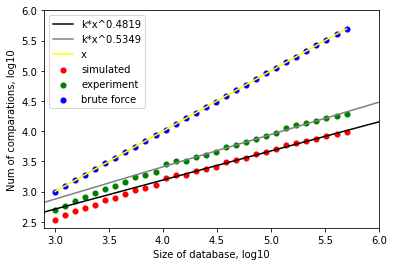

In [39]:
points_for_line = [2,6]
plt.plot(points_for_line, p2(points_for_line),c ='black')
plt.plot(points_for_line, p1(points_for_line),c ='gray')
plt.plot(loged_ref_points, np.array(brute_comps),c ='yellow')
plt.scatter(loged_ref_points, np.array(mod_comps),linewidths=0.1,c ='red')
plt.scatter(loged_ref_points, np.array(exp_comps),linewidths=0.1,c ='green')
plt.scatter(loged_ref_points, np.array(brute_comps),linewidths=0.1,c ='blue')
plt.legend(["k*x^0.4819","k*x^0.5349","x","simulated","experiment","brute force"])
#plt.yscale('log')
#plt.xscale('log')
plt.axis([2.9,6,2.4,6])
plt.xlabel("Size of database, log10")
plt.ylabel("Num of comparations, log10")
#plt.title("Number of distance evaluations")

#plt.savefig("comps for dif test.pdf",format = 'pf')
plt.show()

In [17]:
mod_times = []
exp_times = []
brute_times = []
for i in range(len(mod_samples)):
    mod_times.append(mod_samples[i][0])
    exp_times.append(exp_samples[i][0])
    
    brute_times.append(exp_samples[i][1])
    brute_times.append(mod_samples[i][1])

exp_times = np.array(exp_times)
mod_times = np.array(mod_times)
brute_times = np.array(brute_times)

In [10]:
brute_times_mean = np.mean(brute_times, axis =0)

exp_times_std = np.std(exp_times, axis =0)
mod_times_std = np.std(mod_times, axis =0)

exp_times_mean = np.mean(exp_times, axis =0)
mod_times_mean = np.mean(mod_times, axis =0)

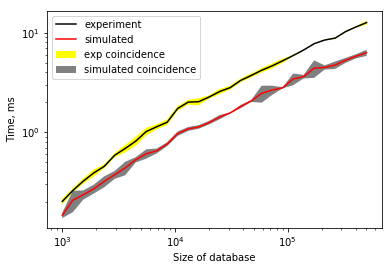

In [42]:
plt.plot(ref_points, exp_times_mean,c="black")
plt.fill_between(ref_points,exp_times_mean - exp_times_std,
                 exp_times_mean + exp_times_std, facecolor='yellow')
plt.plot(ref_points, mod_times_mean,c="red")
plt.fill_between(ref_points,mod_times_mean - mod_times_std,
                mod_times_mean + mod_times_std, facecolor='gray')
plt.legend(["experiment","simulated","exp coincidence","simulated coincidence"])
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel("Size of database")
plt.ylabel("Time, ms")
#plt.title("Speed boost")
#plt.axis([0,5e5 + 100,0,0.014])

plt.show()

Подгоняем корнем

In [50]:
mod_comps = np.array(mod_samples[0][2])/1000
exp_comps =np.array(exp_samples[0][2])/1000

brute_comps =np.array(exp_samples[0][3])/1000

In [98]:
t =10
k1 = mod_comps[t:].dot(np.sqrt(ref_points[t:]))/np.sum(ref_points[t:])
k2 = exp_comps[t:].dot(np.sqrt(ref_points[t:]))/np.sum(ref_points[t:])

In [103]:
print(k1,k2)

14.5193155951 28.3413238752


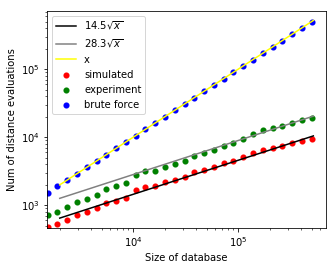

In [170]:
points_for_line = np.array([2e3,5.2e5])
plt.figure(figsize=(5,4))
plt.plot(points_for_line, k1*np.sqrt(points_for_line),c ='black')
plt.plot(points_for_line, k2*np.sqrt(points_for_line),c ='gray')
plt.plot(points_for_line, points_for_line,c ='yellow')
plt.scatter(ref_points, np.array(mod_comps),linewidths=0.1,c ='red')
plt.scatter(ref_points, np.array(exp_comps),linewidths=0.1,c ='green')
plt.scatter(ref_points, brute_comps, linewidths=0.1,c ='blue')
plt.legend(["14.5$\sqrt{x}$","28.3$\sqrt{x}$","x","simulated","experiment","brute force"])
plt.yscale('log')
plt.xscale('log')
#plt.axis([2.9,6,2.4,6])
plt.xlabel("Size of database")
plt.ylabel("Number of distance evaluations")
#plt.title("Number of distance evaluations")

plt.savefig("comps for dif test.tiff",format = 'tiff',dpi=700)
plt.show()

In [145]:
#Уменьшение количества сравнений
print(np.sqrt(ref_points[len(ref_points) - 1])/k1)
print(np.sqrt(ref_points[len(ref_points) - 1])/k2)

48.7588836226
24.9792713459


In [136]:
t =12
k3 = mod_times_mean[t:].dot(np.sqrt(ref_points[t:]))/np.sum(ref_points[t:])
k4 = exp_times_mean[t:].dot(np.sqrt(ref_points[t:]))/np.sum(ref_points[t:])

In [137]:
print(k3,k4)

0.00939844553136 0.0177784420716


In [138]:
gap = brute_times_mean[len(brute_times_mean)-1] - brute_times_mean[0]
gap2 =  ref_points[len(ref_points) -1] - ref_points[0]
k = gap/gap2 
print(k)
b = brute_times_mean[len(brute_times_mean)-1] - ref_points[len(ref_points) -1]*k
print(b)

0.000334389758076
-0.0290026975763


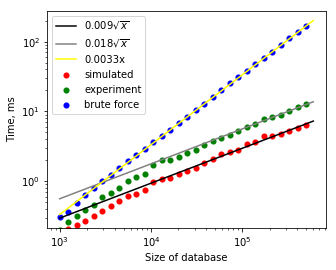

In [167]:
points_for_line = np.array([1e3,6e5])
plt.figure(figsize=(5,4))
plt.plot(points_for_line, k3*np.sqrt(points_for_line),c ='black')
plt.plot(points_for_line, k4*np.sqrt(points_for_line),c ='gray')
plt.plot(points_for_line, k*points_for_line,c ='yellow')
plt.scatter(ref_points, np.array(mod_times_mean),linewidths=0.1,c ='red')
plt.scatter(ref_points, np.array(exp_times_mean),linewidths=0.1,c ='green')
plt.scatter(ref_points, brute_times_mean, linewidths=0.1,c ='blue')
plt.legend(["0.009$\sqrt{x}$","0.018$\sqrt{x}$","0.0033x","simulated","experiment","brute force"])
plt.yscale('log')
plt.xscale('log')
#plt.axis([2.9,6,1e-1,1e2])
plt.xlabel("Size of database")
plt.ylabel("Time, ms")
#plt.title("Number of distance evaluations")

plt.savefig("times for dif test.tiff",format = 'tiff',dpi=700)
plt.show()

In [148]:
print(brute_times_mean[len(ref_points) - 1]/k3/np.sqrt(ref_points[len(ref_points) - 1]))
print(brute_times_mean[len(ref_points) - 1]/k4/np.sqrt(ref_points[len(ref_points) - 1]))

25.1838238778
13.3132473607
